In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # Import seaborn

from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score # Import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression # Import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

In [6]:
df = pd.read_csv("/content/drive/MyDrive/STT NF/Semester 3/Machine Learning/Praktikum Kelas/Praktikum5/data/stunting_wasting_dataset.csv")
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


Missing value & duplicate

In [7]:
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [9]:
df.duplicated().sum()

np.int64(7308)

Re-name kolom dataset

In [10]:
df = df.rename(columns={
    'Jenis Kelamin': 'jenis_kelamin',
    'Umur (bulan)': 'umur_bulan',
    'Tinggi Badan (cm)': 'tinggi_cm',
    'Berat Badan (kg)': 'berat_kg',
    'Stunting': 'stunting',
    'Wasting': 'wasting'
})

In [11]:
df.info

<bound method DataFrame.info of       jenis_kelamin  umur_bulan  tinggi_cm  berat_kg          stunting  \
0         Laki-laki          19       91.6      13.3              Tall   
1         Laki-laki          20       77.7       8.5           Stunted   
2         Laki-laki          10       79.0      10.3            Normal   
3         Perempuan           2       50.3       8.3  Severely Stunted   
4         Perempuan           5       56.4      10.9  Severely Stunted   
...             ...         ...        ...       ...               ...   
99995     Laki-laki          11       75.3       7.3            Normal   
99996     Laki-laki          21       93.7      14.8            Normal   
99997     Perempuan          18       82.9      12.6            Normal   
99998     Laki-laki           7       73.6       5.5            Normal   
99999     Laki-laki          17       88.8       6.7            Normal   

                    wasting  
0        Risk of Overweight  
1               Underweight  
2        Risk of Overweight  
3        Risk of Overweight  
4        Risk of Overweight  
...                     ...  
99995           Underweight  
99996    Risk of Overweight  
99997    Risk of Overweight  
99998  Severely Underweight  
99999  Severely Underweight  

[100000 rows x 6 columns]>

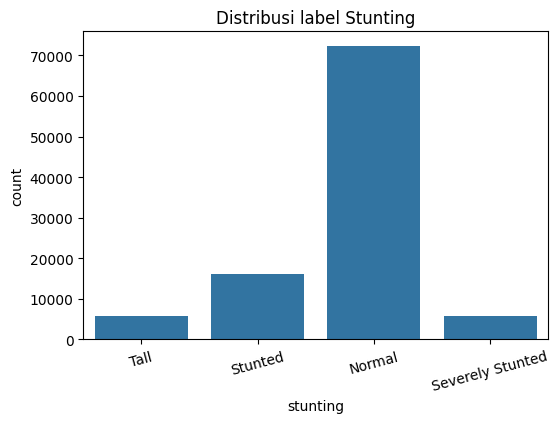

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='stunting', data=df)
plt.title('Distribusi label Stunting')
plt.xticks(rotation=15)
plt.show()

In [13]:
# mapping label -> kode untuk target
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories) # urutan kelas
df['stunting'] = stunting_cat.cat.codes # y numerik

# fitur kategorikal lain (jenis_kelamin, wasting) -> kode juga
for col in ['jenis_kelamin', 'wasting']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

df.head()

,jenis_kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


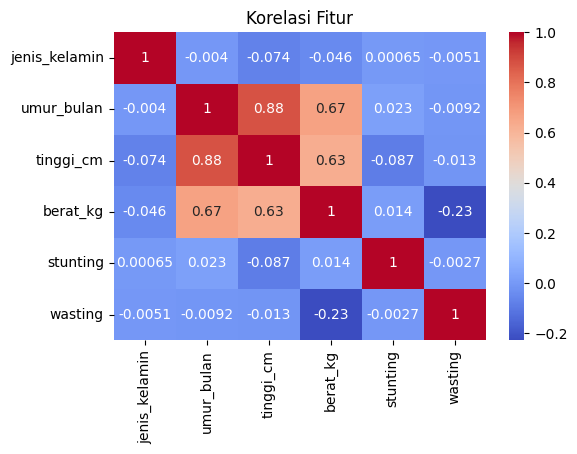

In [14]:
# Korelasi
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [27]:
# Memilih fitur dan target
feature_cols = ['umur_bulan', 'tinggi_cm', 'berat_kg', 'wasting']
X = df[feature_cols]
y = df['stunting']

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

len(X_train), len(X_test)

(80000, 20000)

In [37]:
# Membangun model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [38]:
# Evaluasi
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=stunting_classes
))

Akurasi: 77.67 %

Confusion Matrix:
 [[13927     0   484    51]
 [  666    15   483     0]
 [ 1790     0  1442     0]
 [  992     0     0   150]]

Classification Report:
                   precision    recall  f1-score   support

          Normal       0.80      0.96      0.87     14462
Severely Stunted       1.00      0.01      0.03      1164
         Stunted       0.60      0.45      0.51      3232
            Tall       0.75      0.13      0.22      1142

        accuracy                           0.78     20000
       macro avg       0.79      0.39      0.41     20000
    weighted avg       0.78      0.78      0.73     20000



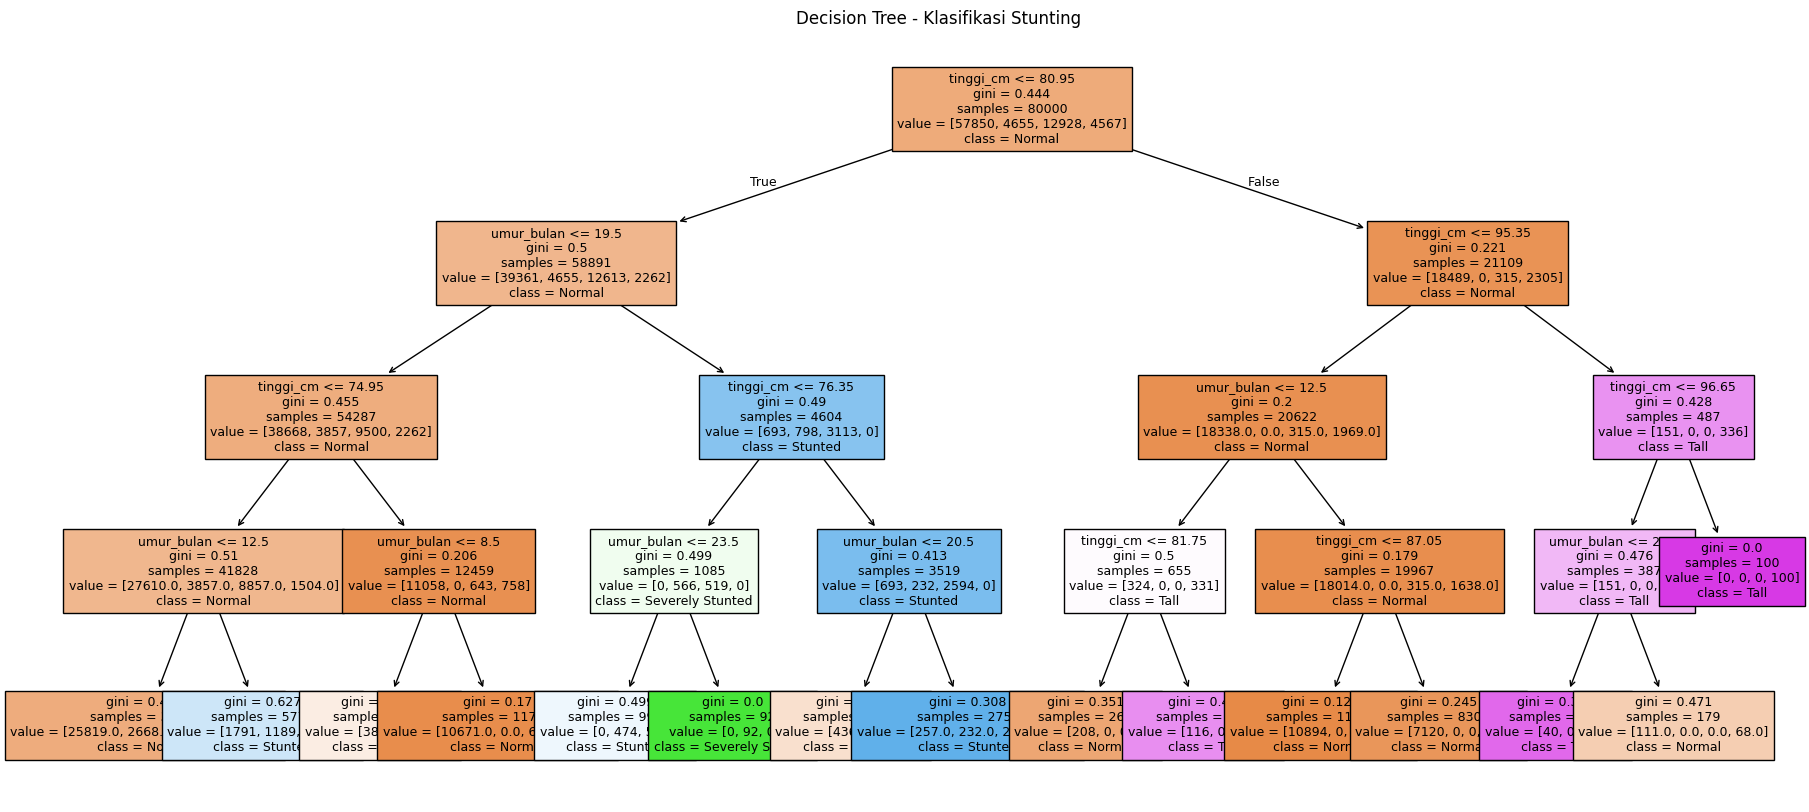

In [46]:
# Visualisasi model
plt.figure(figsize=(22,10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=stunting_classes, # kembali ke nama kelas asli
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Klasifikasi Stunting")
plt.show()

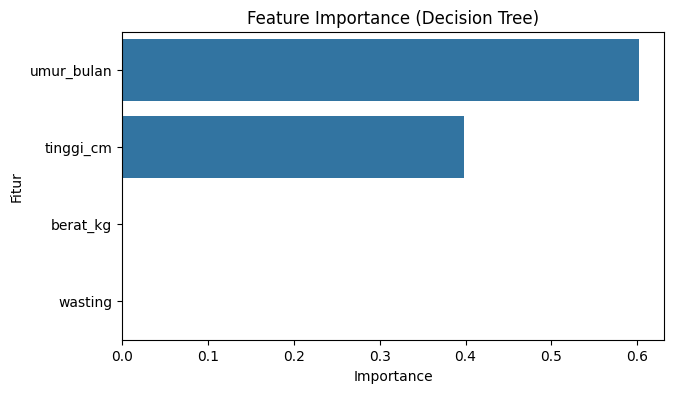

,0
umur_bulan,0.601421
tinggi_cm,0.398579
berat_kg,0.000000
wasting,0.000000


In [47]:
# Fitur yang penting
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp